In [3]:
import os
import random
import matplotlib.pyplot as plt
import cv2 as cv
from tqdm import tqdm
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/CVPR/Mid_A1/Animals'

In [6]:
categories = [c for c in os.listdir(data_path)]
print(categories)

['Cheetah', 'Jaguar', 'Leopard', 'Lion', 'Tiger']


In [34]:
data = []
for c in categories:
    path = os.path.join(data_path, c)
    class_num = categories.index(c)

    for img in tqdm(os.listdir(path)):
        img_arr = cv.imread(os.path.join(path, img), cv.IMREAD_GRAYSCALE)
        img_arr = cv.resize(img_arr, (60, 60), interpolation=cv.INTER_AREA)
        data.append([img_arr, class_num])

print(f"Total data size: {len(data)}")

100%|██████████| 39/39 [00:00<00:00, 93.18it/s]

Total data size: 170


In [35]:
random.shuffle(data)

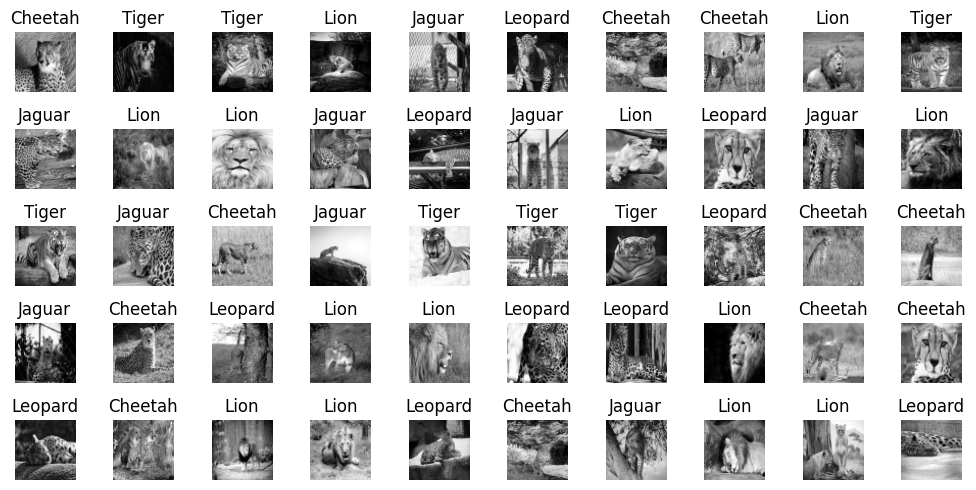

In [37]:
plt.figure(figsize=(10, 5))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(data[i][0], cmap='gray')
    plt.title(categories[data[i][1]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [38]:
f1 = data[0:34]
f2 = data[34:68]
f3 = data[68:102]
f4 = data[102:136]
f5 = data[136:170]

In [39]:
def calc_l2_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


In [40]:
k_max = 30

def calc_distance(train, val):
    l2_result = []
    for v in tqdm(val):
        temp = []
        for t in train:
            temp.append([v[1], t[1], calc_l2_distance(v[0], t[0])])
        temp.sort(key=lambda x: x[2])
        l2_result.append(temp[:k_max])
    return l2_result


In [52]:
fold_distance = []

for i in range(1, 6):
    if i == 1:
        train, validation = f1 + f2 + f3 + f4, f5
    elif i == 2:
        train, validation = f1 + f2 + f3 + f5, f4
    elif i == 3:
        train, validation = f1 + f2 + f4 + f5, f3
    elif i == 4:
        train, validation = f1 + f3 + f4 + f5, f2
    elif i == 5:
        train, validation = f2 + f3 + f4 + f5, f1

    fold_distance.append(calc_distance(train, validation))


100%|██████████| 34/34 [00:00<00:00, 589.59it/s]


In [67]:
def calc_accuracy(distance_val):
    k_acc = []
    for k in range(1, k_max + 1):
        img_acc = 0
        for img_dist in distance_val:
            top_k = img_dist[:k]
            same_class = [t_k for t_k in top_k if t_k[0] == t_k[1]]
            if len(same_class) > k // 2:
                img_acc += 1
        k_acc.append(img_acc / len(distance_val))
    return k_acc

accuracies = [calc_accuracy(fold) for fold in fold_distance]
print(accuracies)

[[0.17647058823529413, 0.058823529411764705, 0.14705882352941177, 0.08823529411764706, 0.08823529411764706, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.029411764705882353, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.20588235294117646, 0.029411764705882353, 0.11764705882352941, 0.058823529411764705, 0.058823529411764705, 0.058823529411764705, 0.08823529411764706, 0.029411764705882353, 0.058823529411764705, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.029411764705882353, 0.0, 0.029411764705882353, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.17647058823529413, 0.029411764705882353, 0.058823529411764705, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.2647058823529412, 0.058823529411764705, 0.23529411764705882, 0.0, 0.029411764705882353, 0.0, 0.029411764705882353, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

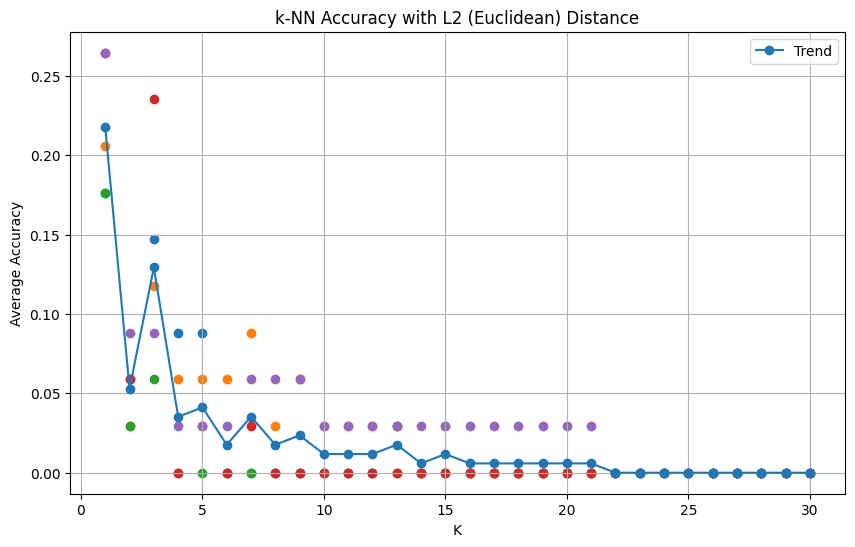

In [72]:
x_list = list(range(1, k_max + 1))

plt.figure(figsize=(10, 6))
for fold in accuracies:
    plt.scatter(x_list, fold)

trend = [np.mean([fold[k] for fold in accuracies]) for k in range(k_max)]
plt.plot(x_list, trend, marker='o', label='Trend')
plt.title('k-NN Accuracy with L2 (Euclidean) Distance')
plt.xlabel('K')
plt.ylabel('Average Accuracy')
plt.legend()
plt.grid()
plt.show()
